<h2>Лабораторная работа №1 по курсу "Методы машинного обучения"</h2>

<p><b>Выполнил:</b> Саврасов П.А. группа ИУ5-24М</p>

<h3>Задание</h3>
<p>Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:</p>
<ul>
<li>История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.</li>
<li>На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.</li>
<li>Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.</li>
<li>Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.</li>
<li>История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.</li>
</ul>

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [31]:
data = pd.read_csv('BankChurners.csv', sep=",")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NBS1,NBS2
0,768805383,1,45,1,3,1,1,2,0,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,1,49,0,5,3,0,0,0,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,1,51,1,3,3,1,3,0,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,1,40,0,4,1,3,0,0,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,1,40,1,3,0,1,2,0,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Рассмотрим распределение клиентов банка по возрасту

<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

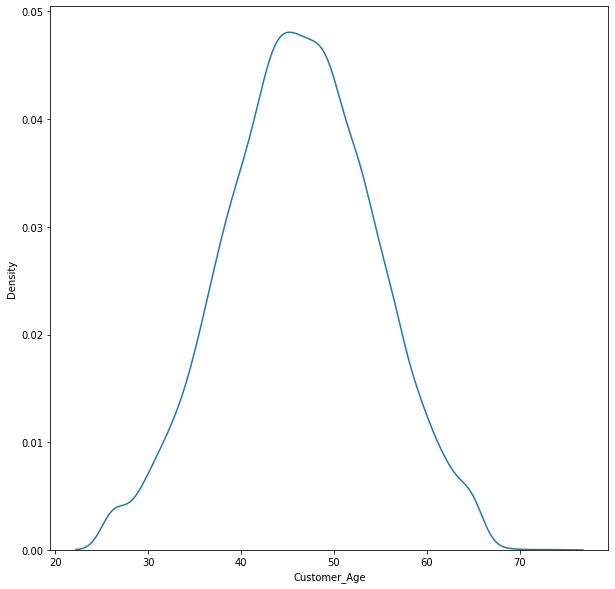

In [32]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.kdeplot(data=data, x="Customer_Age")

Расмотрим число карт различного вида:

<AxesSubplot:xlabel='Card_Category', ylabel='Count'>

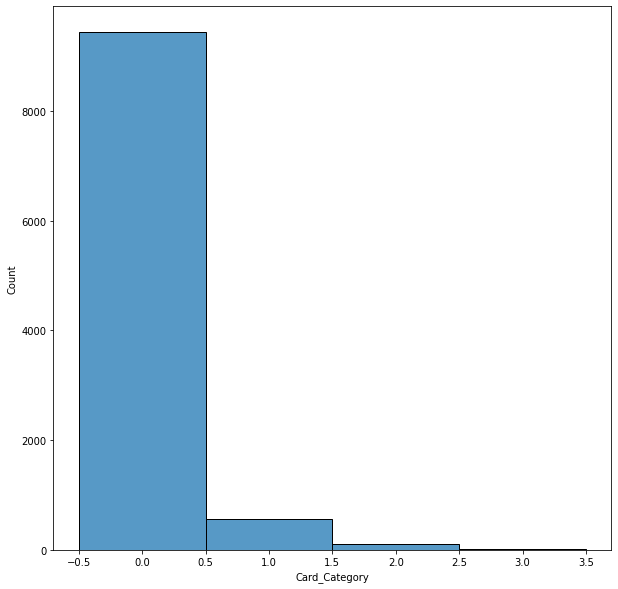

In [33]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.histplot(data['Card_Category'], discrete=True)

<AxesSubplot:xlabel='Card_Category', ylabel='Customer_Age'>

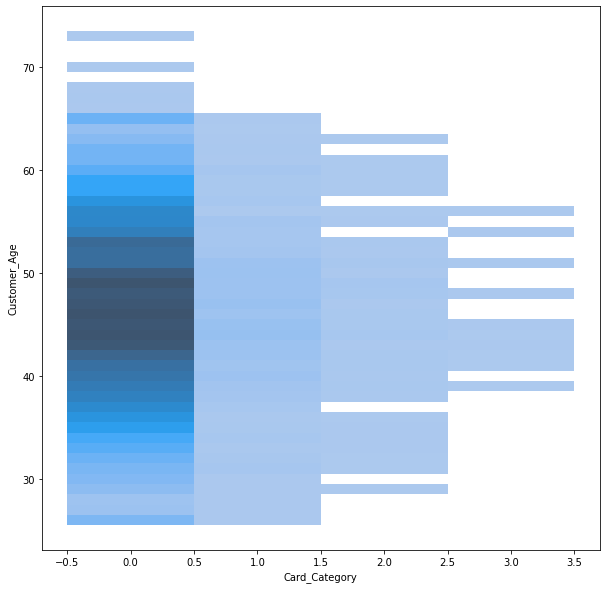

In [41]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.histplot(data, x="Card_Category", y="Customer_Age", discrete=True)

Рассмотрим зависимость средней используемости карты от некоторых категориальных признаков. Для этого применим график вида скрипка.

<AxesSubplot:xlabel='Card_Category', ylabel='Avg_Utilization_Ratio'>

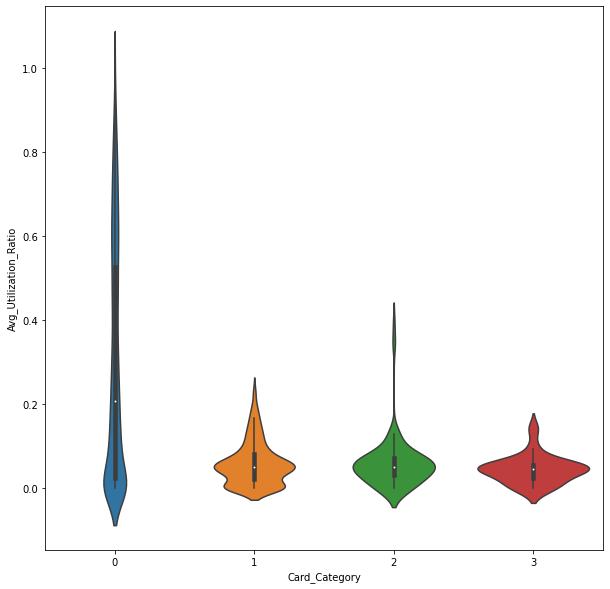

In [34]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.violinplot(x='Card_Category', y='Avg_Utilization_Ratio', data=data)

Из данного графика можно сделать вывод о том, что наибольшая активность присутствует у карт низкого уровня. 

<AxesSubplot:xlabel='Education_Level', ylabel='Avg_Utilization_Ratio'>

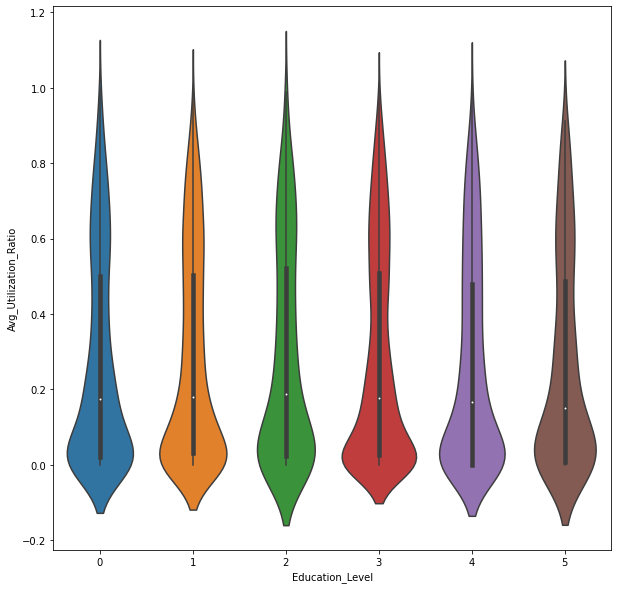

In [35]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.violinplot(x='Education_Level', y='Avg_Utilization_Ratio', data=data)

Из данного графика видно, что зависимости между уровнем образования и активностью использования карты нет.

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Customer_Age'>

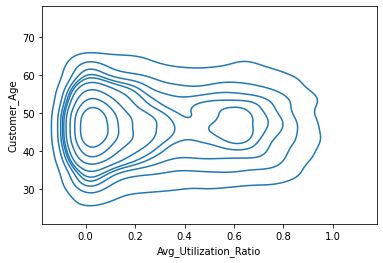

In [42]:
sns.kdeplot(data=data, x="Avg_Utilization_Ratio", y="Customer_Age")

Text(0.5, 0.98, 'Корреляционные матрицы, построенные различными методами')

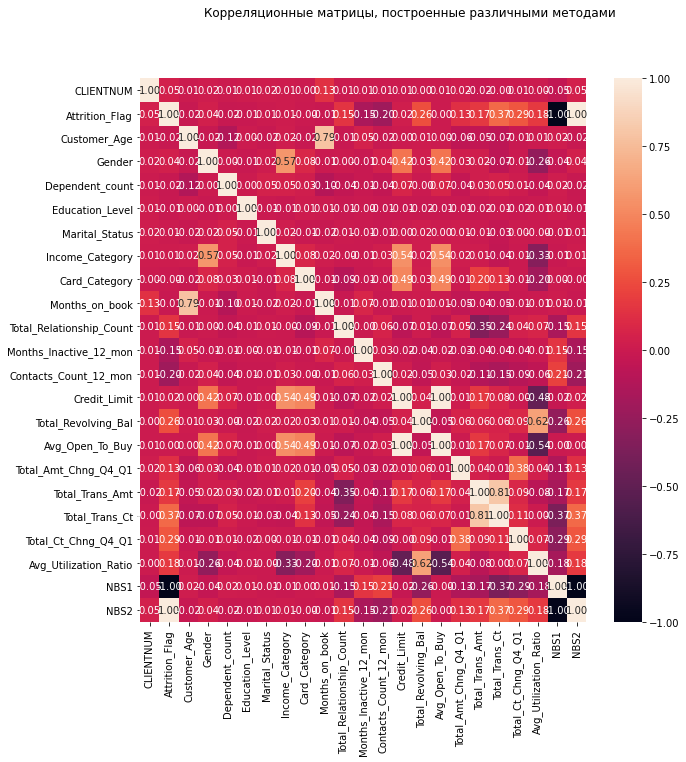

In [37]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')

Расмотрим зависимости имеющие наибольший коэффициент корреляции:

<AxesSubplot:xlabel='Total_Revolving_Bal', ylabel='Avg_Utilization_Ratio'>

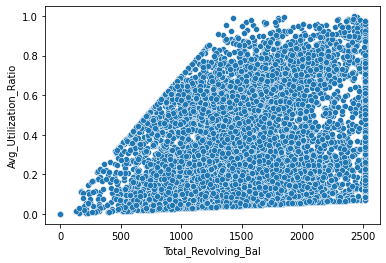

In [38]:
sns.scatterplot(x='Total_Revolving_Bal', y='Avg_Utilization_Ratio', data=data)

<AxesSubplot:xlabel='Customer_Age', ylabel='Months_on_book'>

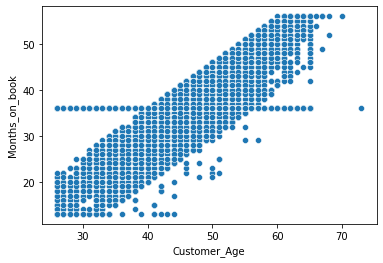

In [39]:
sns.scatterplot(x='Customer_Age', y='Months_on_book', data=data)